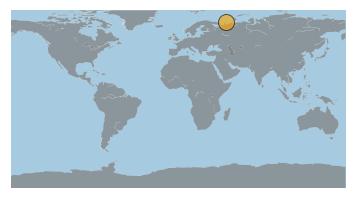

In [0]:
""""libraries
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
 
# Make a data frame with the GPS of a few cities:
data = pd.DataFrame({
'lat':45.5,
    #41.6613,
       #38.642763, 37.5 ,31, 45.5, 39, 42.3 , 44.34, 46],
'lon':69,
    #-91.5299,
       #-98.327818, -85, -92 , 69,-76.7, -71.8, -85.58, -94],
'name':['Maine' ]
        #,'Iowa','Kansas' ,'Kentucky', 'Louisiana', 'Maine', 'Maryland' ,'Massachusetts','Michigan' ,'Minnesota']
})
 
# A basic map
m=Basemap(llcrnrlon=-160, llcrnrlat=-90,urcrnrlon=160,urcrnrlat=80)   #this i have done just for Maine according to its mapping on location you can do it for other country too 
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")
 
# Add a marker per city of the data frame!
m.plot(data['lat'], data['lon'], linestyle='none', marker="o", markersize=16, alpha=0.6, c="orange", markeredgecolor="black", markeredgewidth=1)


In [0]:

import folium
import pandas as pd
import json
from folium import plugins
import plotly.plotly as py
import plotly.figure_factory as ff
import numpy as np


In [0]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [0]:
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3
!pip install plotly==2.7.0

In [2]:

!pip install pyshp

!pip install plotly==2.7.0

In [0]:
import geopandas

import shapely

In [14]:
from google.colab import files
uploaded = files.upload()

Saving starbucksInLACounty.xlsx to starbucksInLACounty (1).xlsx


In [0]:
df = pd.read_excel('geospatialdata.xlsx')  

with open('laMap.geojson') as f:               #the base map 
    laArea = json.load(f)

In [0]:
import geopandas
import shapely
import shapefile
import plotly
from plotly.figure_factory._county_choropleth import create_choropleth
import xlrd
import plotly.plotly as py

In [0]:
import plotly 
plotly.tools.set_credentials_file(username='datashel', api_key='r1LTZe5z8RCSrXHikX6U')

In [10]:
df['STNAME'].value_counts()


Kentucky         120
Kansas           105
Iowa              96
Minnesota         87
Michigan          83
Indiana           68
Louisiana         64
Mississippi       51
Maryland          24
Maine             16
Massachusetts     14
Name: STNAME, dtype: int64

In [16]:
#chloropleth map using plotly 
data = df[df['STNAME'] == 'Kentucky']

values = data['TOT_POP'].tolist()   #to visualize which county in kentucky has max population 
fips = data['FIPS'].tolist()

endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
              "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Kentucky'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='the population of county for the state of Kentucky',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
py.iplot(fig)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [18]:
df.head()

,FIPS,TOT_POP,latitude,longitude,TOT_MALE,zip,STNAME,WA_MALE,TOT_FEMALE,WA_FEMALE,...,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT,city
0,18049,20737,33.831519,-118.239858,10369,90745,Indiana,9985,10368,10020,...,9627,19188,1549,No,0.0747,170,0.01,965,0.0465,Carson
1,18051,33458,33.837239,-118.184724,16642,90807,Indiana,15873,16816,16117,...,15955,31603,1855,No,0.0554,667,0.02,476,0.0142,Long Beach
2,18053,69330,33.841027,-118.182765,33282,90807,Indiana,29587,36048,32460,...,31398,59751,9579,No,0.1382,4936,0.07,2656,0.0383,Long Beach
3,18055,32940,33.841631,-118.262325,16479,90746,Indiana,16179,16461,16167,...,15999,32028,912,No,0.0277,82,0.00,351,0.0107,Carson
4,18057,289495,33.843971,-118.263345,141103,90746,Indiana,125675,148392,131785,...,127105,248084,41411,No,0.1430,11332,0.04,10548,0.0364,Carson


In [86]:
#numStoresSeries = df.groupby('STNAME')
df1=df[['FIPS','latitude',	'longitude']]

,FIPS,TOT_POP,strLocation,latitude,longitude,city,TOT_MALE,zip,CTYNAME,STNAME,...,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT
0,18049,20737,Carson & Wilmington,33.831519,-118.239858,Carson,10369,90745,Fulton County,Indiana,...,9561,9627,19188,1549,No,0.0747,170,0.01,965,0.0465
1,18051,33458,Atlantic & San Antonio,33.837239,-118.184724,Long Beach,16642,90807,Gibson County,Indiana,...,15648,15955,31603,1855,No,0.0554,667,0.02,476,0.0142
2,18053,69330,Vons-Long Beach #3519,33.841027,-118.182765,Long Beach,33282,90807,Grant County,Indiana,...,28353,31398,59751,9579,No,0.1382,4936,0.07,2656,0.0383
3,18055,32940,"Avalon & Dominguez, Carson",33.841631,-118.262325,Carson,16479,90746,Greene County,Indiana,...,16029,15999,32028,912,No,0.0277,82,0.00,351,0.0107
4,18057,289495,Target Carson T-2026,33.843971,-118.263345,Carson,141103,90746,Hamilton County,Indiana,...,120979,127105,248084,41411,No,0.1430,11332,0.04,10548,0.0364
68,19001,7481,Hastings Ranch,34.150464,-118.073182,Pasadena,3716,91107,Adair County,Iowa,...,3627,3671,7298,183,No,0.0245,16,0.00,94,0.0126
69,19003,3911,Lake & California,34.136012,-118.132483,Pasadena,1944,91101,Adams County,Iowa,...,1883,1916,3799,112,No,0.0286,11,0.00,39,0.0100
70,19005,14237,Sierra Madre,34.162443,-118.052837,Sierra Madre,7277,91024,Allamakee County,Iowa,...,6646,6413,13059,1178,No,0.0827,171,0.01,857,0.0602
71,19007,12700,Fairoaks & California - Pasadena,34.136273,-118.150208,Pasadena,6214,91105,Appanoose County,Iowa,...,5986,6246,12232,468,No,0.0369,70,0.01,199,0.0157
72,19009,5910,Verdugo & 2 Freeway,34.206002,-118.217606,La Canada,2842,91011,Audubon County,Iowa,...,2778,2992,5770,140,No,0.0237,21,0.00,50,0.0085


In [0]:
#using the basemap
m= folium.Map(location=[34.0522,-118.2437], tiles='Stamen Toner', zoom_start=9)

#add the shape of LA County to the map
folium.GeoJson(laArea).add_to(m)

#plotting the city witht the help of lat and longitude 
for i,j in df.iterrows():
    folium.CircleMarker((j.latitude,j.longitude), radius=3, weight=2, color='red', fill_color='red', fill_opacity=.5).add_to(m)

#save the map as an html    
m.save('DotMap.html')
from google.colab import files
files.download( "DotMap.html" )

In [21]:
#initialize the LA County map
laMap = folium.Map(location=[34.0522,-118.2437], tiles='Stamen Toner', zoom_start=9)

#add the shape of LA County to the map
folium.GeoJson(laArea).add_to(laMap)

#for each row in the Starbucks dataset, plot the corresponding latitude and longitude on the map
for i,j in df.iterrows():
    folium.CircleMarker((j.latitude,j.longitude), radius=3, weight=2, color='blue', fill_color='blue', fill_opacity=.5).add_to(laMap)

#add the heatmap. The core parameters are:
#--data: a list of points of the form (latitude, longitude) indicating locations of Starbucks stores

#--radius: how big each circle will be around each Starbucks store

#--blur: the degree to which the circles blend together in the heatmap

laMap.add_children(plugins.HeatMap(data=df[['latitude', 'longitude','NHWA_FEMALE']].as_matrix(), radius=20, blur=10))

#save the map as an html
laMap.save('Heatmap.html')
from google.colab import files
files.download( "Heatmap.html" )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning:

Method `add_children` is deprecated. Please use `add_child` instead.



In [70]:
len(df)
df.head()
df.dtypes

FIPS                   int64
TOT_POP                int64
strLocation           object
latitude             float64
longitude            float64
city                  object
TOT_MALE               int64
zip                    int64
CTYNAME               object
STNAME                object
state                 object
WA_MALE                int64
TOT_FEMALE             int64
WA_FEMALE              int64
NHWA_MALE              int64
NHWA_FEMALE            int64
NHWhite_Alone          int64
Not_NHWhite_Alone      int64
MinorityMinority      object
MinorityPCT          float64
Black                  int64
BlackPCT             float64
Hispanic               int64
HispanicPCT          float64
dtype: object

In [20]:
df.head()

,FIPS,TOT_POP,strLocation,latitude,longitude,city,TOT_MALE,zip,CTYNAME,STNAME,...,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT
0,18049,20737,Carson & Wilmington,33.831519,-118.239858,Carson,10369,90745,Fulton County,Indiana,...,9561,9627,19188,1549,No,0.0747,170,0.01,965,0.0465
1,18051,33458,Atlantic & San Antonio,33.837239,-118.184724,Long Beach,16642,90807,Gibson County,Indiana,...,15648,15955,31603,1855,No,0.0554,667,0.02,476,0.0142
2,18053,69330,Vons-Long Beach #3519,33.841027,-118.182765,Long Beach,33282,90807,Grant County,Indiana,...,28353,31398,59751,9579,No,0.1382,4936,0.07,2656,0.0383
3,18055,32940,"Avalon & Dominguez, Carson",33.841631,-118.262325,Carson,16479,90746,Greene County,Indiana,...,16029,15999,32028,912,No,0.0277,82,0.00,351,0.0107
4,18057,289495,Target Carson T-2026,33.843971,-118.263345,Carson,141103,90746,Hamilton County,Indiana,...,120979,127105,248084,41411,No,0.1430,11332,0.04,10548,0.0364


In [0]:
#initialize the LA County map
laMap = folium.Map(location=[34.0522,-118.2437], tiles='Stamen Toner', zoom_start=9)
#m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)

#add the shape of LA County to the map
folium.GeoJson(laArea).add_to(laMap)
for i in range(0,len(df)):
   folium.CircleMarker(
      location=[df.iloc[i]['longitude'], df.iloc[i]['latitude']],
      popup=df.iloc[i]['city'],
      radius=df.iloc[i]['MinorityPCT']*1000,
      color='blue',
      fill=False,
      fill_color='blue'
   ).add_to(laMap)
 
# Save it as html
laMap.save('bubblemap.html')


In [0]:
from google.colab import files
files.download( "bubblemap.html" )

In [27]:
df.head()

,FIPS,TOT_POP,strLocation,latitude,longitude,city,TOT_MALE,zip,CTYNAME,STNAME,...,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT
0,18049,20737,Carson & Wilmington,33.831519,-118.239858,Carson,10369,90745,Fulton County,Indiana,...,9561,9627,19188,1549,No,0.0747,170,0.01,965,0.0465
1,18051,33458,Atlantic & San Antonio,33.837239,-118.184724,Long Beach,16642,90807,Gibson County,Indiana,...,15648,15955,31603,1855,No,0.0554,667,0.02,476,0.0142
2,18053,69330,Vons-Long Beach #3519,33.841027,-118.182765,Long Beach,33282,90807,Grant County,Indiana,...,28353,31398,59751,9579,No,0.1382,4936,0.07,2656,0.0383
3,18055,32940,"Avalon & Dominguez, Carson",33.841631,-118.262325,Carson,16479,90746,Greene County,Indiana,...,16029,15999,32028,912,No,0.0277,82,0.00,351,0.0107
4,18057,289495,Target Carson T-2026,33.843971,-118.263345,Carson,141103,90746,Hamilton County,Indiana,...,120979,127105,248084,41411,No,0.1430,11332,0.04,10548,0.0364


In [39]:
!pip install plotly --upgrade

     |████████████████████████████████| 41.2MB 45.9MB/s 
  Found existing installation: plotly 2.7.0
    Uninstalling plotly-2.7.0:
      Successfully uninstalled plotly-2.7.0


In [12]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

import plotly
plotly.__version__

'3.9.0'

In [13]:




df['text'] = df['STNAME'] + '<br>Population ' + (df['TOT_POP']/1e6).astype(str)+' million'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []
scale = 5000

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    city = go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['text'],
        marker = go.Scattergeo.Marker(
            size = df_sub['TOT_POP']/scale,
            color = colors[i],
            line = go.scattergeo.marker.Line(
                width=0.5, color='rgb(40,40,40)'
            ),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = go.Layout(
        title = go.layout.Title(
            text = '2014 US city populations<br>(Click legend to toggle traces)'
        ),
        showlegend = True,
        geo = go.layout.Geo(
            scope = 'usa',
            projection = go.layout.geo.Projection(
                type='albers usa'
            ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )

fig = go.Figure(data=cities, layout=layout)
py.iplot(fig, filename='d3-bubble-map-populations')


AttributeError: ignored

In [34]:
from plotly import __version__
print(__version__)

2.7.0
